### Unsupervised learning 

#### Model:

K-Means

#### Libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import manhattan_distances
import numpy as np
%matplotlib inline

In [30]:
decibel_00 = pd.read_csv('all_decibel00.csv')
#abnorm_00 = 
#norm_00 = 

In [31]:
decibel_00

chroma_stft  spectral_centroid  spectral_bandwidth  spectral_rolloff  \
0        0.598840        1089.177017         1383.735396       2262.105631   
1        0.576613        1000.493633         1383.642244       1959.265176   
2        0.560939        1432.253254         1764.015225       3193.091054   
3        0.339193        1100.711037         1226.349827       2160.193690   
4        0.466292         987.975508         1345.496758       2061.875998   
...           ...                ...                 ...               ...   
5092     0.311252        1382.161327         1739.975834       2738.468450   
5093     0.368219         946.641369         1405.789708       1890.125799   
5094     0.419019         972.465287         1274.905200       2007.787540   
5095     0.327517        1357.745634         1824.084602       3023.512380   
5096     0.283465        1394.601763         1872.973318       3205.945487   

           rms  zero_crossing_rate  class  
0     0.010383            0.064060      1  
1     0.010091            0.052560      1  
2     0.009649            0.080421      1  
3     0.012322            0.071298      1  
4     0.013467            0.042864      1  
...        ...                 ...    ...  
5092  0.005223            0.084697      0  
5093  0.005232            0.049231      0  
5094  0.005857            0.055215      0  
5095  0.005703            0.067955      0  
5096  0.005798            0.074010      0  

[5097 rows x 7 columns]

In [45]:
from sklearn.cluster import KMeans

# number of decibel_00 clusters
team_size = 3
      
decibel_00_metrics = pd.DataFrame(decibel_00)

# z-score normalisation
decibel_00_metrics_normalized=(decibel_00_metrics-decibel_00_metrics.mean())/decibel_00_metrics.std()
decibel_00_metrics_normalized = decibel_00_metrics_normalized.rename(columns={'chroma_stft': 'chroma_stft_zscore',
                                                                        'spectral_centroid':'spectral_centroid_zscore',
                                                                       'spectral_bandwidth': 'spectral_bandwidth_zscore',
                                                                       'spectral_rolloff': 'spectral_rolloff_zscore',
                                                                       'rms': 'rms_zscore',
                                                                       'zero_crossing_rate': 'zero_crossing_rate_zscore',})      


# fit a kmeans object to the dataset
kmeans = KMeans(n_clusters=team_size, init='k-means++').fit(decibel_00_metrics_normalized)

# clusters is an attribute of the object
cluster_centers = kmeans.cluster_centers_

# add cluster index to dataframe
cluster_labels = pd.Series(kmeans.labels_, name='cluster')
df_cluster_labels = pd.DataFrame(cluster_labels)
decibel_00_metrics_normalized = decibel_00_metrics_normalized.join(df_cluster_labels)

In [46]:
decibel_00_metrics_normalized

chroma_stft_zscore  spectral_centroid_zscore  spectral_bandwidth_zscore  \
0               1.188325                 -1.044661                  -1.355427   
1               1.018738                 -1.302126                  -1.355827   
2               0.899153                 -0.048648                   0.280440   
3              -0.792681                 -1.011176                  -2.032459   
4               0.177036                 -1.338468                  -1.519920   
...                  ...                       ...                        ...   
5092           -1.005865                 -0.194074                   0.177029   
5093           -0.571228                 -1.458469                  -1.260555   
5094           -0.183644                 -1.383497                  -1.823586   
5095           -0.881766                 -0.264957                   0.538843   
5096           -1.217866                 -0.157957                   0.749150   

      spectral_rolloff_zscore  rms_zscore  zero_crossing_rate_zscore  \
0                   -1.059904    1.674200                  -0.726772   
1                   -1.451406    1.545712                  -1.072075   
2                    0.143642    1.351010                  -0.235517   
3                   -1.191653    2.527231                  -0.509436   
4                   -1.318754    3.030882                  -1.363184   
...                       ...         ...                        ...   
5092                -0.444078   -0.595660                  -0.107129   
5093                -1.540787   -0.592032                  -1.172031   
5094                -1.388678   -0.317127                  -0.992354   
5095                -0.075583   -0.384730                  -0.609813   
5096                 0.160260   -0.342766                  -0.428028   

         class  cluster  
0     1.992963        0  
1     1.992963        0  
2     1.992963        1  
3     1.992963        0  
4     1.992963        0  
...        ...      ...  
5092 -0.501667        1  
5093 -0.501667        0  
5094 -0.501667        0  
5095 -0.501667        1  
5096 -0.501667        1  

[5097 rows x 8 columns]

In [47]:
decibel_00_metrics_normalized['cluster'].nunique()

3

In [48]:
#sns.pairplot(decibel_00_metrics_normalized)

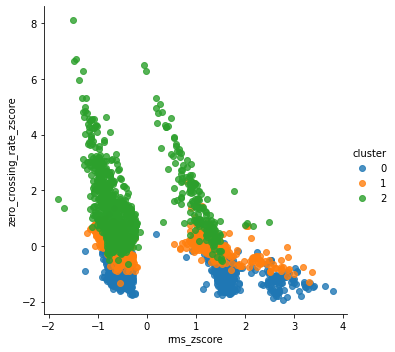

In [57]:
sns.lmplot(x = 'rms_zscore', y = 'zero_crossing_rate_zscore', 
           data=decibel_00_metrics_normalized, hue='cluster',
          fit_reg= False)

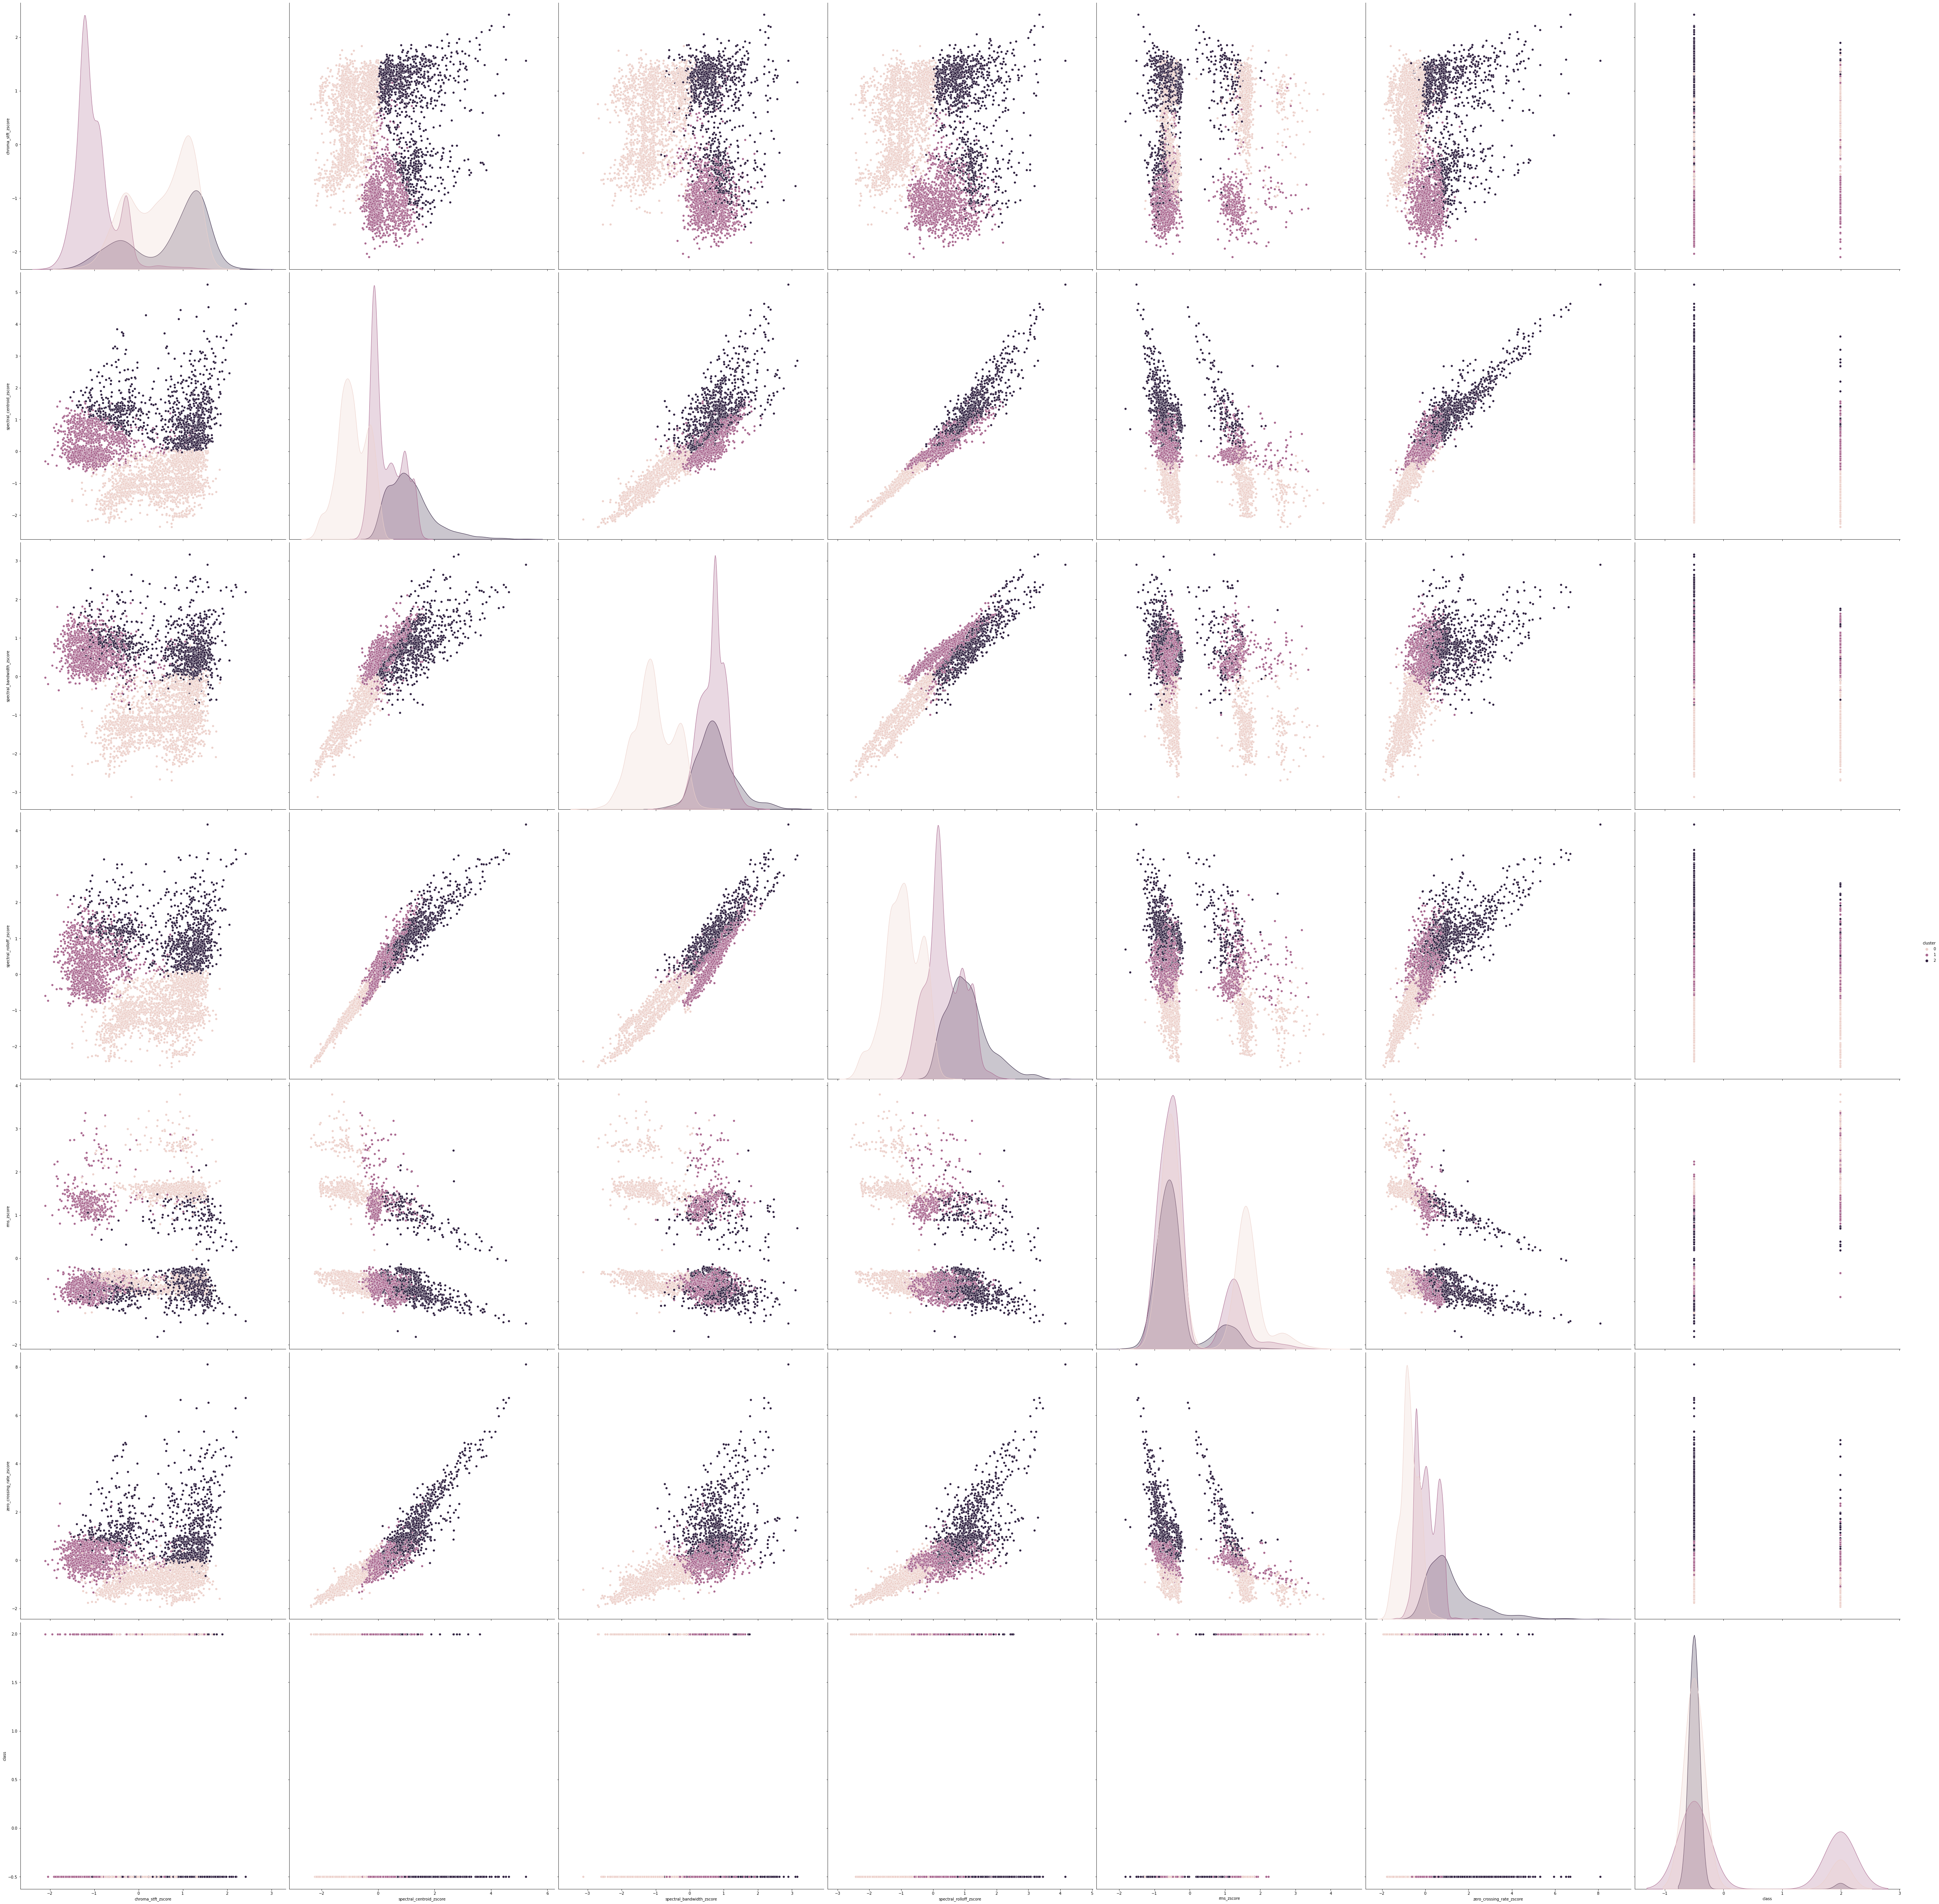

In [53]:
sns.pairplot(decibel_00_metrics_normalized, hue='cluster', height=10)

Running K-Means with a range of k 

In [62]:
# run K-Means for a range of clusters using a for loop and collecting the distortions into a list.

distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(df)
    distortions.append(kmeanModel.inertia_)

Plotting the distortions of K-Means

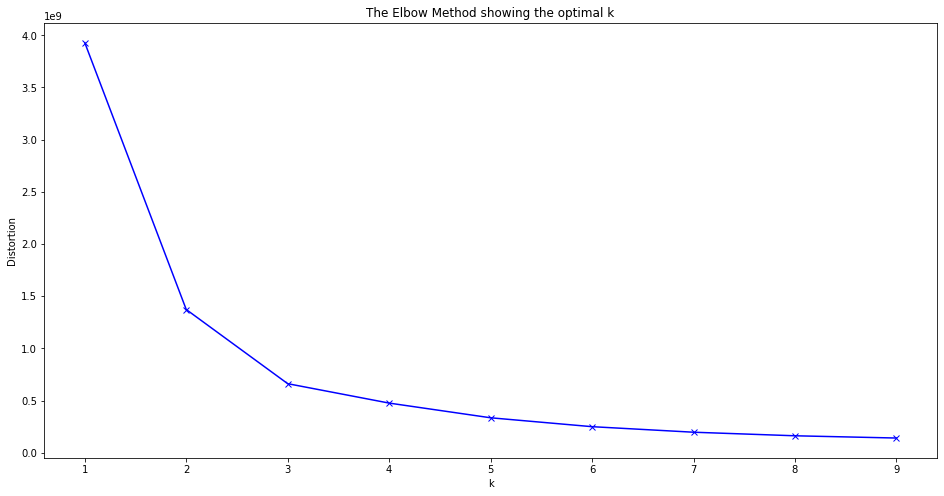

In [63]:
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [64]:
kmeanModel = KMeans(n_clusters=3)
kmeanModel.fit(df)

KMeans(n_clusters=3)

K-Means vs Actual for n_clusters=3

In [78]:
df['k_means']=kmeanModel.predict(decibel_00)

In [79]:
df['k_means']

0       1
1       1
2       2
3       1
4       1
       ..
5092    2
5093    1
5094    1
5095    2
5096    2
Name: k_means, Length: 5097, dtype: int32

### Resources

https://uoa-eresearch.github.io/eresearch-cookbook/recipe/2014/11/20/conda/

https://hal.archives-ouvertes.fr/tel-01394280v2/document

https://yzrobot.github.io/mobile_robotics/P20-UN56-clustering.pdf

https://predictivehacks.com/k-means-elbow-method-code-for-python/